## 1 Rotation Curves

    a) Merry go round - A
    Planets in a galaxy - C
    
    A - Merry go round - omega = v/r or v = omega*r
    C - Planets in a solar system  - mv^2/r = GmM/r^2
                            v = sqrt(GM/r)

    b) Rotational speed increases rapidly till the edge of the central bulge then plateaus
    THe mass of the galaxy is distributed majority located the further you go out.


    c) The speed vs the distance is not the same as we think it is for the solar system compared to the galaxy. If it were the same, the mass distribution would also be the same.

## 2 Rotation Curves: Data

a)


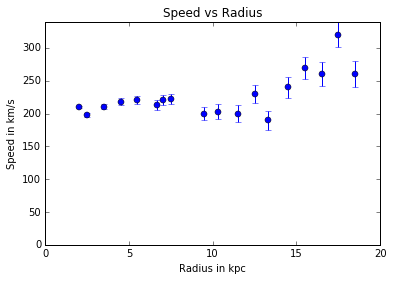

In [102]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

rd = [2.0 , 2.5, 3.5, 4.5, 5.5, 6.7, 7, 7.5, 9.5, 10.3, 11.5, 12.5, 13.3, 14.5, 15.5, 16.5, 17.5, 18.5]
v = [210, 198, 210, 218, 220, 213, 220, 222, 200, 203, 200, 230, 190, 240, 270, 260, 320, 260]

yerr = [x*1.08 for x in rd]
print "a)"
plt.errorbar(rd, v, yerr=yerr, fmt='o')
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.xlabel("Radius in kpc")
plt.ylabel("Speed in km/s")
plt.title('Speed vs Radius')

plt.show()

b)


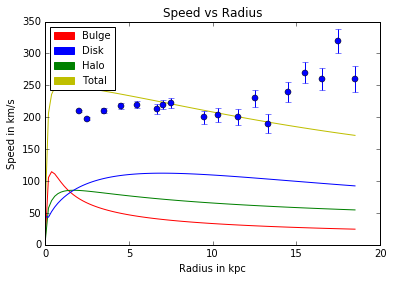

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

MB = 1.3*10**(10.0)
MH = 10**(9.0)
MD = 6.5*10**(10.0)
kpc2m = 3.086*10**(19.0)
m_sun = 2*10**(30.0)

def rowB(M,r):
    aB = 0.4*kpc2m
    rowB0 = (M/(4*np.pi*aB**(3.0)))*((1+((r/aB)**(2.0)))**(-2.5))
    return rowB0

def rowH(M,r):
    aH = 0.5*kpc2m
    rowH0 = M*10**(9.0)*(aH+r)**(-3.1)
    return rowH0

    
def sigmaD(M,r):
    aD = 4.0*kpc2m
    sigmaD0 = (M/(2*np.pi*aD**(2.0)))*np.exp(-r/aD)
    return sigmaD0

def dmdrB(M,r):
    r = r*kpc2m
    M = M*m_sun
    dmdr0 = 4*np.pi*(r**(2.0))*rowB(M,r)
    return dmdr0

def dmdrH(M,r):
    r = r*kpc2m
    M = M*m_sun
    dmdr0 = 4*np.pi*(r**(2.0))*rowH(M,r)
    return dmdr0

def dmdrD(M,r):
    r = r*kpc2m
    M = M*m_sun
    dmdr0 = 2*np.pi*r*sigmaD(M,r)
    return dmdr0
    
def dmdrtot(r):
    dmb = dmdrB(MB,r)
    dmh = dmdrH(MH,r)
    dmd = dmdrB(MD,r)
    dmtot = (dmb + dmh + dmb)
    return dmtot

r = np.linspace(0.001, 18.5, 100)

#Bulge

dmB = [dmdrB(MB,r[x])*(18.5/100) for x in range(100)]

for i in range(100):
    if i == 0:
        dmB[i] = dmB[i]
    else:
        dmB[i] += dmB[i-1]

velB = np.zeros(100)        

for i in range(100):
    velB[i] = np.sqrt((0.6*(6.67*10**(-11))*dmB[i])/r[i])
    
#Halo

dmH = [dmdrH(MH,r[x])*(18.5/100) for x in range(100)]

for i in range(100):
    if i == 0:
        dmH[i] = dmH[i]
    else:
        dmH[i] += dmH[i-1]

velH = np.zeros(100)        

for i in range(100):
    velH[i] = (np.sqrt((0.6*(6.67*10**(-11))*dmH[i])/r[i]))/3500

#Disk

dmD = [dmdrD(MD,r[x])*(18.5/100) for x in range(100)]

for i in range(100):
    if i == 0:
        dmD[i] = dmD[i]
    else:
        dmD[i] += dmD[i-1]

velD = np.zeros(100)        

for i in range(100):
    velD[i] = np.sqrt((0.6*(6.67*10**(-11))*dmD[i])/r[i])
    
#Total

velTot = np.zeros(100)        

for i in range(100):
    velTot[i] = velB[i] + velH[i] + velD[i]
    
print "b)"
    
plt.plot(r, velTot/1000, 'y')
plt.plot(r, velB/1000, 'r')
plt.plot(r, velH/1000, 'g')
plt.plot(r, velD/1000, 'b')
plt.xlabel('Radius in kpc')
plt.ylabel('Speed in km/s')

red_patch = mpatches.Patch(color='r', label='Bulge')
blue_patch = mpatches.Patch(color='b', label='Disk')
green_patch = mpatches.Patch(color='g', label='Halo')
yellow_patch = mpatches.Patch(color='y', label='Total')
plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch], loc = 2, prop={'size':10})
plt.title('Speed vs Radius')

plt.errorbar(rd, v, yerr=yerr, fmt='o')

plt.show()

    c) The total velocity does not fit the data. What is needed is the dark matter that causes the speed to increase as it expands out to the disk.

d)


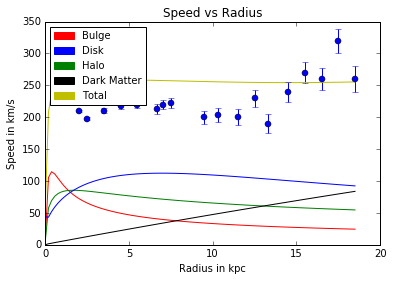

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

MB = 1.3*10**(10.0)
MH = 10**(9.0)
MD = 6.5*10**(10.0)
MDM = 4.2*10**(6.0)
kpc2m = 3.086*10**(19.0)
m_sun = 2*10**(30.0)

def rowB(M,r):
    aB = 0.4*kpc2m
    rowB0 = (M/(4*np.pi*aB**(3.0)))*((1+((r/aB)**(2.0)))**(-2.5))
    return rowB0

def rowH(M,r):
    aH = 0.5*kpc2m
    rowH0 = M*10**(9.0)*(aH+r)**(-3.1)
    return rowH0

    
def sigmaD(M,r):
    aD = 4.0*kpc2m
    sigmaD0 = (M/(2*np.pi*aD**(2.0)))*np.exp(-r/aD)
    return sigmaD0

def rowDM(M,r):
    aDM = 230*kpc2m
    rowDM0 = M*10**(9.0)*(aDM+r)**(-3.1)
    return rowDM0

def dmdrB(M,r):
    r = r*kpc2m
    M = M*m_sun
    dmdr0 = 4*np.pi*(r**(2.0))*rowB(M,r)
    return dmdr0

def dmdrH(M,r):
    r = r*kpc2m
    M = M*m_sun
    dmdr0 = 4*np.pi*(r**(2.0))*rowH(M,r)
    return dmdr0

def dmdrD(M,r):
    r = r*kpc2m
    M = M*m_sun
    dmdr0 = 2*np.pi*r*sigmaD(M,r)
    return dmdr0
    
def dmdrDM(M,r):
    r = r*kpc2m
    M = M*m_sun
    dmdr0 = 4*np.pi*(r**(2.0))*rowDM(M,r)
    return dmdr0    

def dmdrtot(r):
    dmb = dmdrB(MB,r)
    dmh = dmdrH(MH,r)
    dmd = dmdrB(MD,r)
    dmdm = dmdrDM(MDM, r)
    dmtot = (dmb + dmh + dmb + dmdm)
    return dmtot

r = np.linspace(0.001, 18.5, 100)

#Bulge

dmB = [dmdrB(MB,r[x])*(18.5/100) for x in range(100)]

for i in range(100):
    if i == 0:
        dmB[i] = dmB[i]
    else:
        dmB[i] += dmB[i-1]

velB = np.zeros(100)        

for i in range(100):
    velB[i] = np.sqrt((0.6*(6.67*10**(-11))*dmB[i])/r[i])
    
#Halo

dmH = [dmdrH(MH,r[x])*(18.5/100) for x in range(100)]

for i in range(100):
    if i == 0:
        dmH[i] = dmH[i]
    else:
        dmH[i] += dmH[i-1]

velH = np.zeros(100)        

for i in range(100):
    velH[i] = (np.sqrt((0.6*(6.67*10**(-11))*dmH[i])/r[i]))/3500

#Disk

dmD = [dmdrD(MD,r[x])*(18.5/100) for x in range(100)]

for i in range(100):
    if i == 0:
        dmD[i] = dmD[i]
    else:
        dmD[i] += dmD[i-1]

velD = np.zeros(100)        

for i in range(100):
    velD[i] = np.sqrt((0.6*(6.67*10**(-11))*dmD[i])/r[i])
    
#Dark Matter

dmDM = [dmdrDM(MDM,r[x])*(18.5/100) for x in range(100)]

for i in range(100):
    if i == 0:
        dmDM[i] = dmDM[i]
    else:
        dmDM[i] += dmDM[i-1]

velDM = np.zeros(100)        

for i in range(100):
    velDM[i] = np.sqrt((0.6*(6.67*10**(-11))*dmDM[i])/r[i])
    
#Total

velTot = np.zeros(100)        

for i in range(100):
    #velTot[i] = np.sqrt((0.6*(6.67*10**(-11))*dmTot[i])/r[i])
    velTot[i] = velB[i] + velH[i] + velD[i] + velDM[i]

print "d)"
plt.plot(r, velTot/1000, 'y')
plt.plot(r, velB/1000, 'r')
plt.plot(r, velH/1000, 'g')
plt.plot(r, velD/1000, 'b')
plt.plot(r, velDM/1000, 'k')
plt.xlabel('Radius in kpc')
plt.ylabel('Speed in km/s')

red_patch = mpatches.Patch(color='r', label='Bulge')
blue_patch = mpatches.Patch(color='b', label='Disk')
green_patch = mpatches.Patch(color='g', label='Halo')
black_patch = mpatches.Patch(color='k', label='Dark Matter')
yellow_patch = mpatches.Patch(color='y', label='Total')
plt.legend(handles=[red_patch, blue_patch, green_patch, black_patch, yellow_patch], loc = 2, prop={'size':10})
plt.title('Speed vs Radius')

plt.errorbar(rd, v, yerr=yerr, fmt='o')

plt.show()

    d) There should be an extra spherical halo with a mass of 4.2*10^6 solar masses and with a scale parameter of 230 kpc. The Plummer sphere is not the best description. Not sure if it would even work with a modified version of the Plummer sphere.